<a href="https://colab.research.google.com/github/shweta-aiml/CourseraTensorFlow/blob/master/Random_Numbers_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: ignored

In [3]:
!pip install tf-nightly-2.0-preview


     |████████████████████████████████| 95.2MB 33.6MB/s 
     |████████████████████████████████| 3.8MB 34.8MB/s 
     |████████████████████████████████| 450kB 39.7MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
ERROR: tb-nightly 2.1.0a20191127 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


In [1]:
import pandas as pd  
from random import random
import tensorflow as tf
tf.__version__

'2.0.0-dev20191002'

In [0]:
flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random() 

In [3]:
data.size

35980

In [0]:
import numpy as np

def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

In [5]:
(X_train, y_train), (X_test, y_test) = train_test_split(data)  # retrieve data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [7]:
X_train.shape,y_train.shape

((16091, 100, 2), (16091, 2))

In [6]:
X_train[0],y_train[0]

(array([[7.51084721, 1.66907716],
        [6.67630863, 2.50361574],
        [5.84177005, 3.33815432],
        [5.00723147, 4.1726929 ],
        [4.1726929 , 5.00723147],
        [3.33815432, 5.84177005],
        [2.50361574, 6.67630863],
        [1.66907716, 7.51084721],
        [0.83453858, 8.34538579],
        [1.66907716, 7.51084721],
        [2.50361574, 6.67630863],
        [3.33815432, 5.84177005],
        [4.1726929 , 5.00723147],
        [5.00723147, 4.1726929 ],
        [5.84177005, 3.33815432],
        [6.67630863, 2.50361574],
        [7.51084721, 1.66907716],
        [8.34538579, 0.83453858],
        [7.51084721, 1.66907716],
        [6.67630863, 2.50361574],
        [5.84177005, 3.33815432],
        [5.00723147, 4.1726929 ],
        [4.1726929 , 5.00723147],
        [3.33815432, 5.84177005],
        [2.50361574, 6.67630863],
        [1.66907716, 7.51084721],
        [0.83453858, 8.34538579],
        [1.66907716, 7.51084721],
        [2.50361574, 6.67630863],
        [3.338

In [14]:

in_out_neurons = 2  
hidden_neurons = 300

model = tf.keras.models.Sequential()  
model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]))
model.add(tf.keras.layers.LSTM(in_out_neurons, return_sequences=False))  
model.add(tf.keras.layers.Dense(hidden_neurons,activation='linear'))  
model.compile(loss="mean_squared_error", optimizer="rmsprop") 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, None, 1)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 2)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 300)               900       
Total params: 932
Trainable params: 932
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train, y_train, batch_size=450, nb_epoch=10, validation_split=0.05)  


In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [23]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(X_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32,input_shape=(100,2), return_sequences=True),
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dense(2),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(X_train,y_train, epochs=10, callbacks=[lr_schedule])

Train on 16091 samples
Epoch 1/10
16091/16091 [==============================] - 45s 3ms/sample - loss: 40.6806 - mae: 41.1806
Epoch 2/10
16091/16091 [==============================] - 43s 3ms/sample - loss: 34.2660 - mae: 34.7660
Epoch 3/10
16091/16091 [==============================] - 43s 3ms/sample - loss: 27.0669 - mae: 27.5668
Epoch 4/10
16091/16091 [==============================] - 43s 3ms/sample - loss: 19.0384 - mae: 19.5384
Epoch 5/10
16091/16091 [==============================] - 43s 3ms/sample - loss: 10.8116 - mae: 11.2975
Epoch 6/10
16091/16091 [==============================] - 43s 3ms/sample - loss: 6.2852 - mae: 6.7708
Epoch 7/10
16091/16091 [==============================] - 43s 3ms/sample - loss: 3.9513 - mae: 4.4303
Epoch 8/10
16091/16091 [==============================] - 43s 3ms/sample - loss: 2.9129 - mae: 3.3563
Epoch 9/10
16091/16091 [==============================] - 43s 3ms/sample - loss: 2.3891 - mae: 2.8227
Epoch 10/10
16091/16091 [========================

[1e-08, 0.0001, 0, 30]

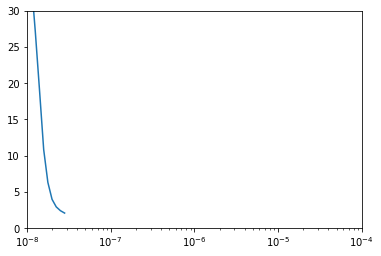

In [24]:
import matplotlib.pyplot as plt

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [0]:
predicted = model.predict(X_test)  
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))

# and maybe plot it
predicted = pd.DataFrame(predicted[:100])  
#pd.DataFrame(y_test[:100]).plot()  



In [26]:
predicted

,0,1
0,2.412052,3.013484
1,2.298589,2.832658
2,2.243914,3.196064
3,2.110239,4.025272
4,1.921666,5.119688
...,...,...
95,1.777302,6.303748
96,2.003229,7.420664
97,3.083922,8.221068
98,5.141917,8.461130


In [22]:
X_test.shape

(1699, 100, 2)

In [15]:
rmse

array([2.98652083, 1.94727629])